<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/k2_pix_small.png">
*This notebook contains an excerpt instructional material from [gully](https://twitter.com/gully_) and the [K2 Guest Observer Office](https://keplerscience.arc.nasa.gov/); the content is available [on GitHub](https://github.com/gully/goldenrod).*


<!--NAVIGATION-->
< [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) | [Contents](Index.ipynb) | [Supernova Searches](02.00-Supernova_searches.ipynb) >

# Exploratory analysis of K2 transient light curves

In this notebook we examine a *known* transient event captured by K2.

Overview:

1. Retrieve data from MAST
2. Look at the lightcurve
3. Look at the TPF
4. Compare to EVEREST

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
from astropy.io import fits
import ipywidgets as widgets
import pyke
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/ryanr/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### 1. Retrieve data from MAST

Here is a known transient:  
[EPIC 212593538 interactive on MAST](https://archive.stsci.edu/canvas/k2hlsp_plot.html?k2=212593538&c=6&type=LC)  
[EPIC 212593538 links to lightcurves and TPF](https://archive.stsci.edu/k2/preview.php?dsn=KTWO212593538-C06&type=LC)



Save and download the files linked above to `../data`.  Let's look at the lightcurve first.

In [2]:
hdu = fits.open('../data/ktwo212593538-c06_llc.fits')

In [3]:
hdu.info()

Filename: ../data/ktwo212593538-c06_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  LIGHTCURVE    1 BinTableHDU    155   3863R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        48   (8, 8)   int32   


Examine the aperture.

In [4]:
hdu_ap = hdu['APERTURE']

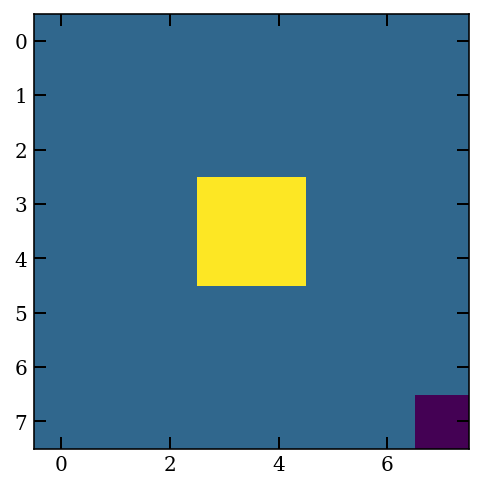

In [5]:
plt.imshow(hdu_ap.data)

In [6]:
dat = hdu['LIGHTCURVE'].data

In [7]:
dat.shape

(3863,)

In [8]:
len(dat[0])

20

In [9]:
dat.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'SAP_FLUX',
 'SAP_FLUX_ERR',
 'SAP_BKG',
 'SAP_BKG_ERR',
 'PDCSAP_FLUX',
 'PDCSAP_FLUX_ERR',
 'SAP_QUALITY',
 'PSF_CENTR1',
 'PSF_CENTR1_ERR',
 'PSF_CENTR2',
 'PSF_CENTR2_ERR',
 'MOM_CENTR1',
 'MOM_CENTR1_ERR',
 'MOM_CENTR2',
 'MOM_CENTR2_ERR',
 'POS_CORR1',
 'POS_CORR2']

In [10]:
dat['TIME']

array([ 2384.4632718 ,  2384.48370406,  2384.50413641, ...,  2463.33005237,
        2463.35048422,  2463.37091607])

(2390, 2420)

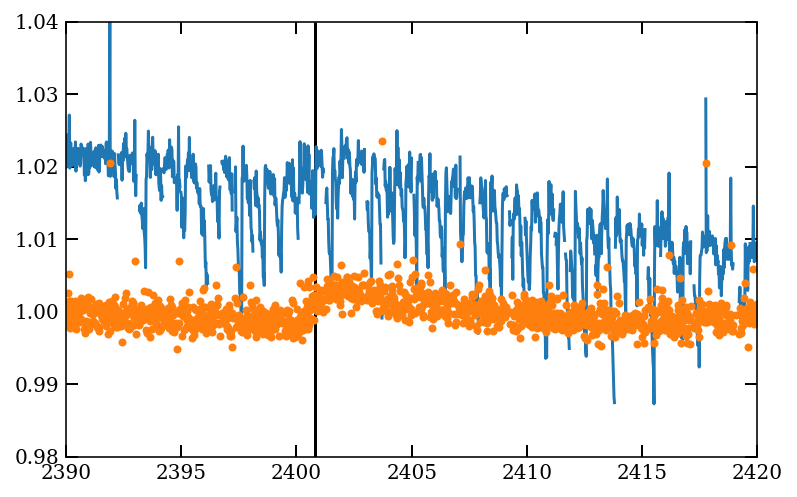

In [11]:
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']))
plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.')
plt.vlines(dat['TIME'][800], 0.98, 1.04)
plt.ylim(0.98, 1.04)
plt.xlim(2390, 2420)

PDC might not be useful for Supernova signals, even though it mitigates some instrumental artifacts.

(2390, 2420)

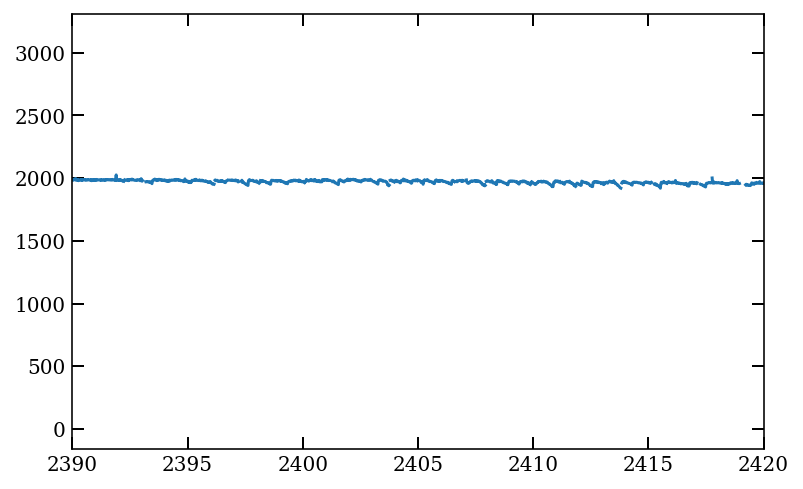

In [12]:
plt.plot(dat['TIME'], dat['SAP_FLUX'])
#plt.plot(dat['TIME'], dat['']/np.nanmedian(dat['PDCSAP_FLUX']))
plt.vlines(dat['TIME'][800], 0.98, 1.04)
#plt.ylim(0.98, 1.04)
plt.xlim(2390, 2420)

### What does the target pixel file look like?

Also downloaded from the link above.

In [13]:
hdu2 = fits.open('../data/ktwo212593538-c06_lpd-targ.fits')

In [14]:
hdu2.info()

Filename: ../data/ktwo212593538-c06_lpd-targ.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      54   ()      
  1  TARGETTABLES    1 BinTableHDU    282   3863R x 13C   [D, E, J, 64J, 64E, 64E, 64E, 64E, 64E, J, E, E, 0E]   
  2  APERTURE      1 ImageHDU        48   (8, 8)   int32   


In [15]:
dat2 = hdu2[1].data

In [16]:
dat2.names

['TIME',
 'TIMECORR',
 'CADENCENO',
 'RAW_CNTS',
 'FLUX',
 'FLUX_ERR',
 'FLUX_BKG',
 'FLUX_BKG_ERR',
 'COSMIC_RAYS',
 'QUALITY',
 'POS_CORR1',
 'POS_CORR2',
 'RB_LEVEL']

In [17]:
dat2['TIME']

array([ 2384.4632718 ,  2384.48370406,  2384.50413641, ...,  2463.33005237,
        2463.35048422,  2463.37091607])

In [18]:
dat2['FLUX'].shape

(3863, 8, 8)

In [19]:
frame300 = dat2['FLUX'][300, :,:]

In [20]:
frame300.shape

(8, 8)

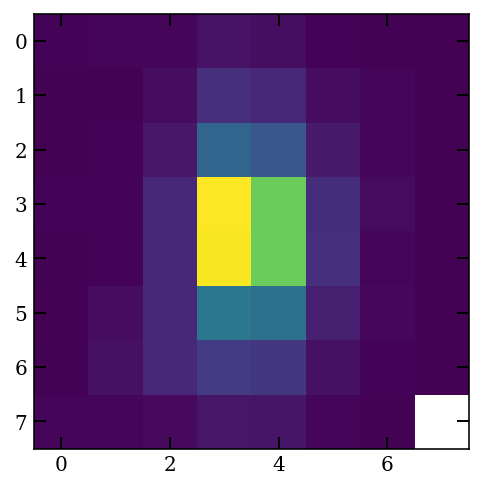

In [21]:
plt.imshow(frame300);

Can we animate it?

In [22]:
from ipywidgets import interact
from ipywidgets import interact, interactive, fixed, interact_manual

In [23]:
def plttpf(f):
    plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', alpha=0.3)
    plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.', alpha=0.3)
    plt.ylim(0.98, 1.04)
    plt.xlim(2390, 2420)
    plt.vlines(dat['TIME'][f], 0.98, 1.04)
    plt.show()
    plt.imshow(dat2['FLUX'][f, :,:]-dat2['FLUX'][900, :,:])
    plt.show()

In [24]:
interact(plttpf, f=(700,2000,1));

interactive(children=(IntSlider(value=1350, description='f', max=2000, min=700), Output()), _dom_classes=('widget-interact',))

## Spot-check the EVEREST lightcurve of this known transient

In [28]:
import everest

In [29]:
star = everest.Everest(212593538)

INFO  [everest.user.DownloadFile()]: Found cached file.
INFO  [everest.user.load_fits()]: Loading FITS file for 212593538.


In [30]:
star.dvs()

INFO  [everest.user.DownloadFile()]: Found cached file.


INFO  [everest.user.plot()]: Plotting the light curve...


/Users/ryanr/anaconda3/lib/python3.5/site-packages/everest/user.py:628: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/Users/ryanr/anaconda3/lib/python3.5/site-packages/everest/user.py:644: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


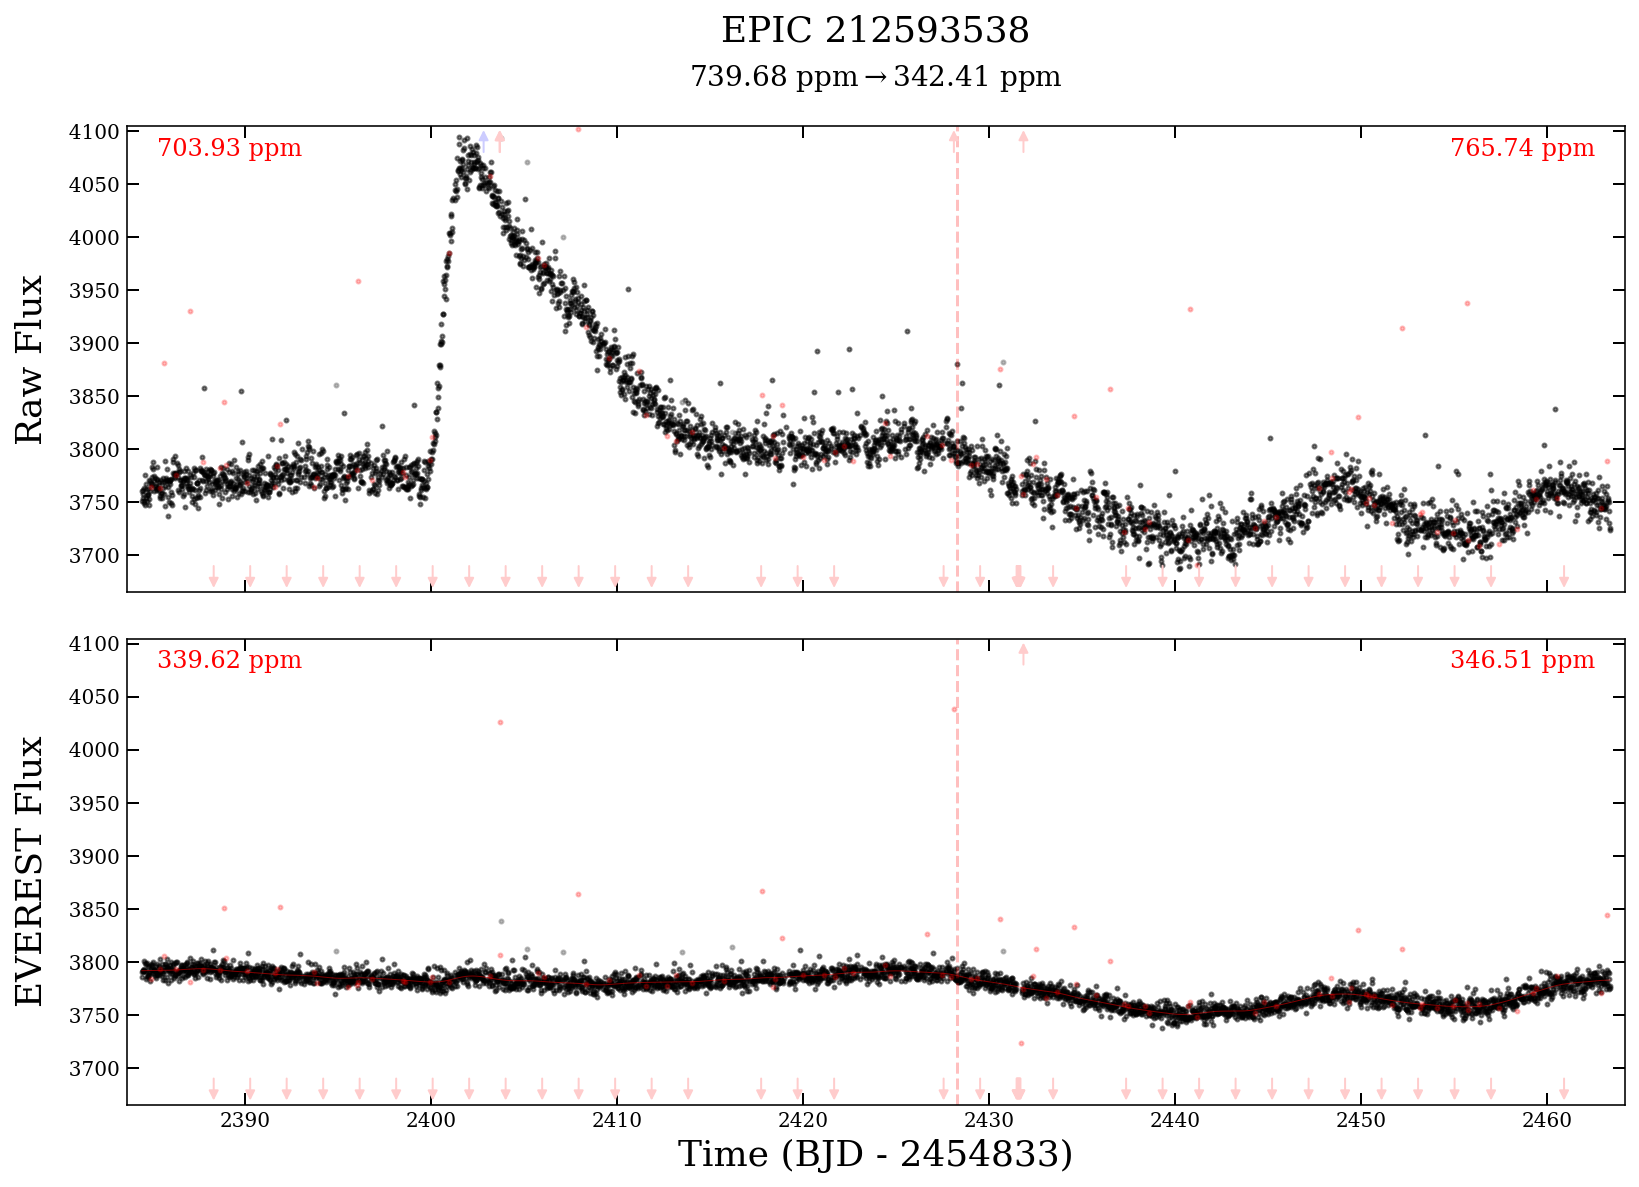

In [31]:
star.plot()

INFO  [everest.missions.k2.pipelines.get()]: Downloading everest1 light curve for 212593538...


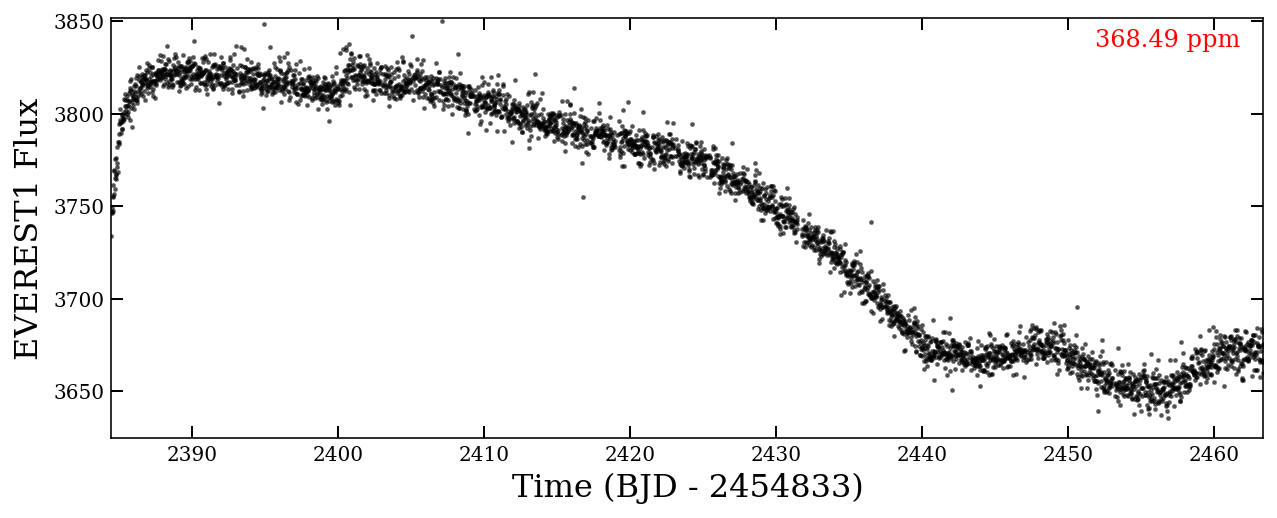

In [32]:
star.plot_pipeline('everest1')

INFO  [everest.missions.k2.pipelines.get()]: Downloading k2sff light curve for 212593538...


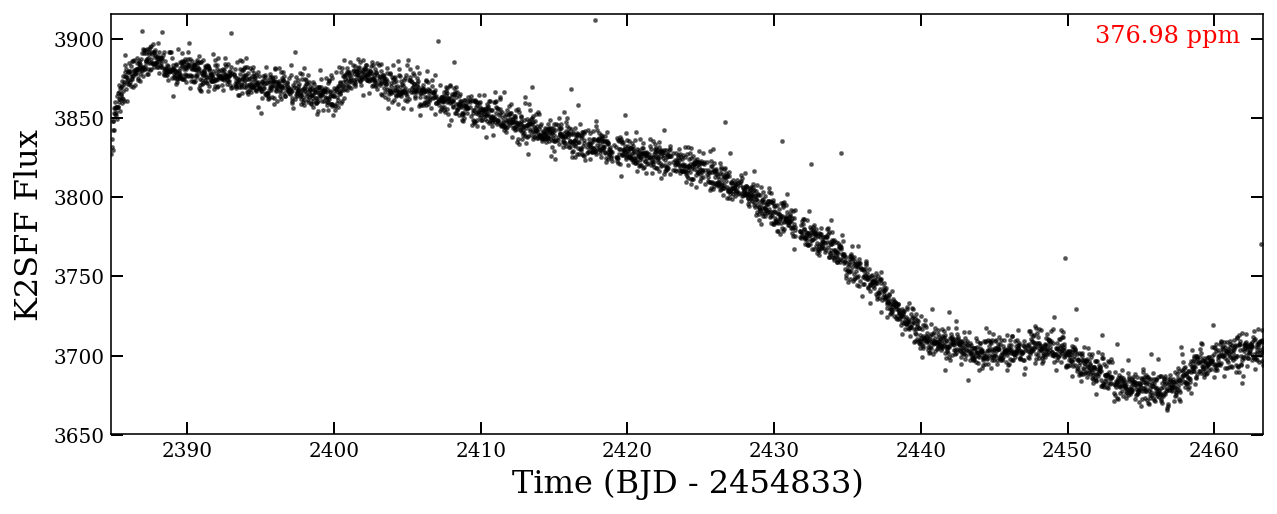

In [33]:
star.plot_pipeline('k2sff')

### Compare Kepler Pipeline's PDC to EVEREST's "Raw"

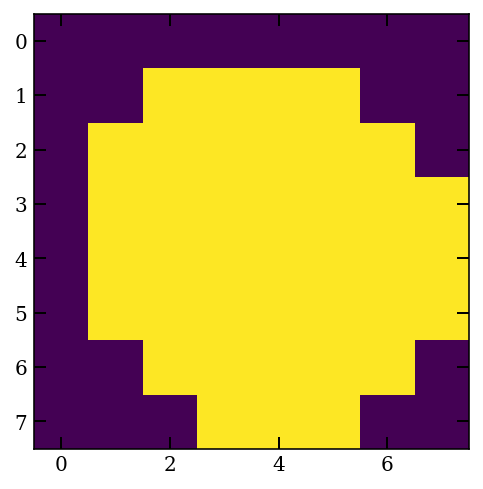

In [34]:
plt.imshow(star.aperture)

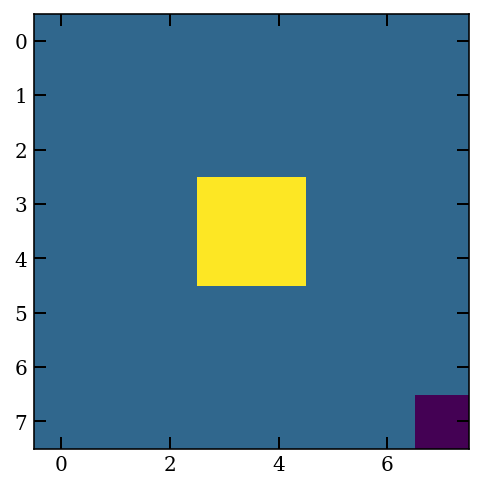

In [35]:
plt.imshow(hdu_ap.data)

In [36]:
star.aperture

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0]])

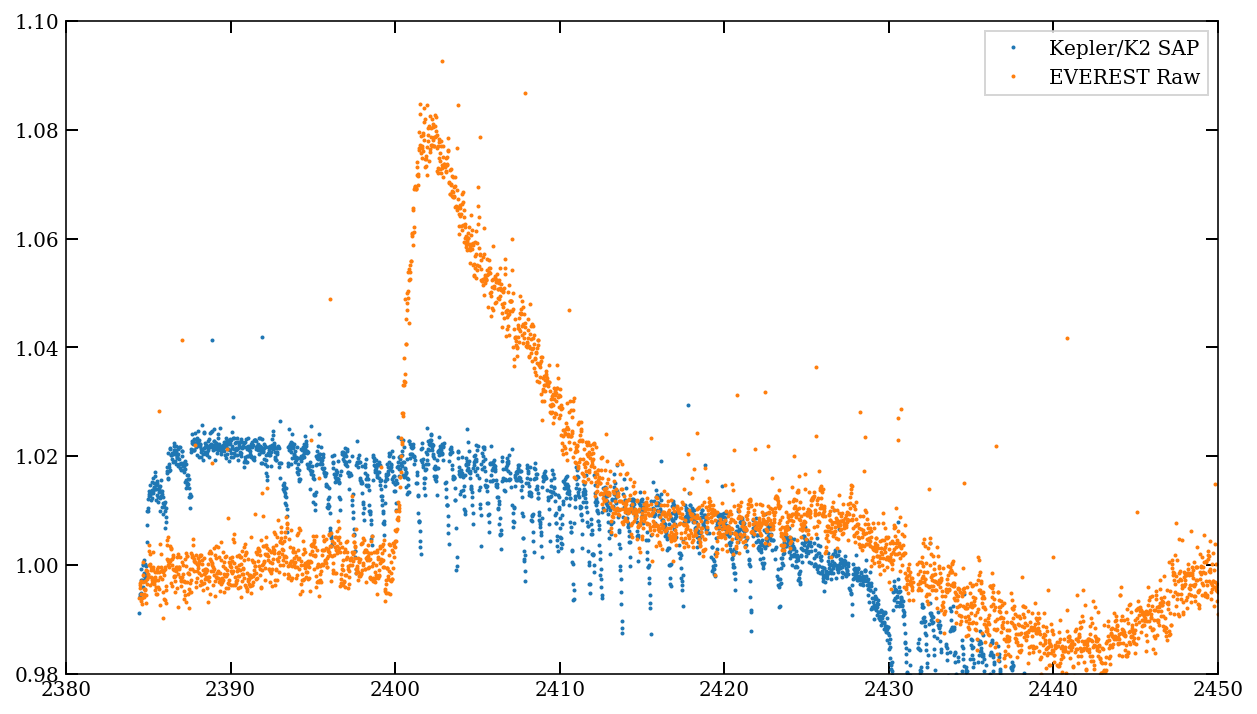

In [37]:
plt.figure(figsize=(10, 6))
#plt.plot(dat['TIME'], dat['PDCSAP_FLUX']/np.nanmedian(dat['PDCSAP_FLUX']), '.', label = 'Kepler/K2 PDC', ms=2)
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', label = 'Kepler/K2 SAP', ms=2)
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)
plt.ylim(0.98, 1.1)
plt.xlim(2380, 2450)
plt.legend(loc='best');

In [38]:
datacube = dat2['FLUX']

In [39]:
ev_masked = datacube*star.aperture

In [40]:
ev_masked.shape

(3863, 8, 8)

In [41]:
manual_lc = np.nansum(datacube*star.aperture, axis=(1,2))

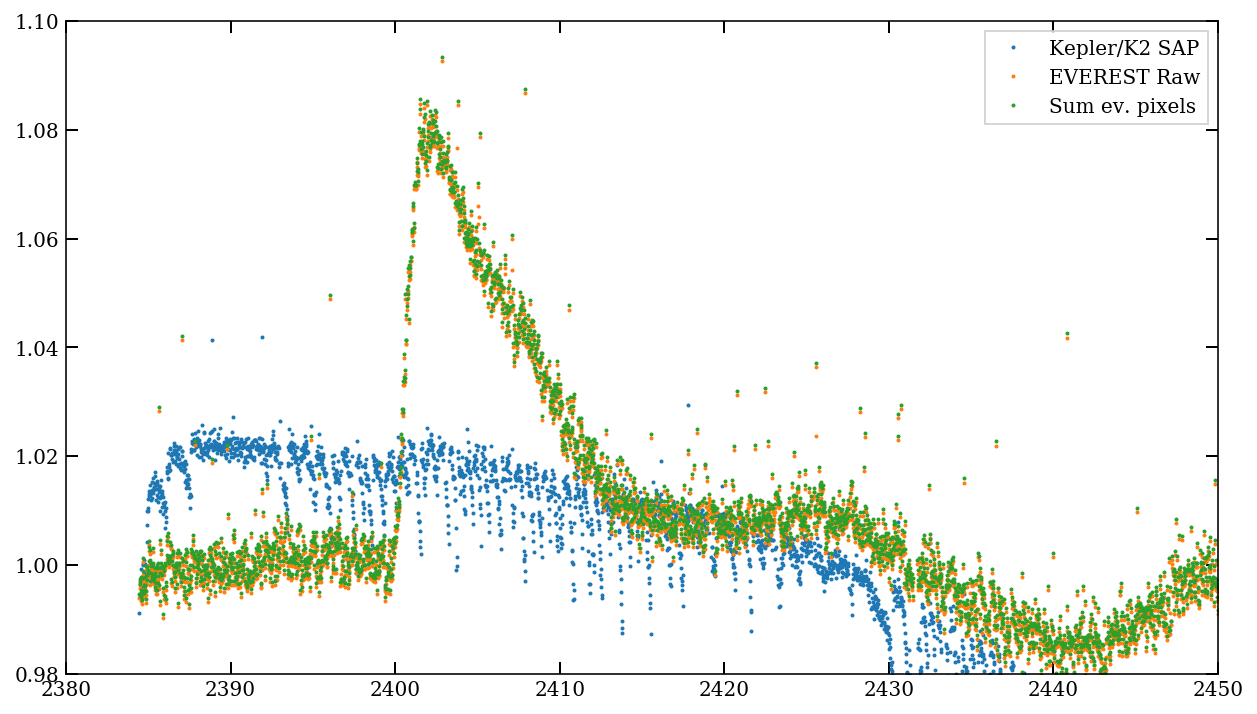

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(dat['TIME'], dat['SAP_FLUX']/np.nanmedian(dat['SAP_FLUX']), '.', label = 'Kepler/K2 SAP', ms=2)
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)
plt.plot(star.time, manual_lc/np.nanmedian(manual_lc), '.', label='Sum ev. pixels', ms=2)
plt.ylim(0.98, 1.1)
plt.xlim(2380, 2450)
plt.legend(loc='best');

## Try to "freeze" the motion by samping on 6 hour timescales.

In [43]:
ev_masked.shape

(3863, 8, 8)

In [44]:
ev_masked[:-12:12,:,:].shape

(321, 8, 8)

In [45]:
ev_masked[12:-1:12,:,:].shape

(321, 8, 8)

In [46]:
diffed = ev_masked[:-12:12,:,:] - ev_masked[11::12,:,:]

What the sum along the time axis?

In [47]:
np.nanstd(diffed)

22.18770189048119

In [48]:
n_steps = 12

In [49]:
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(ev_masked[i:-n_steps+i:n_steps,:,:] - ev_masked[i+n_steps*80,:,:])

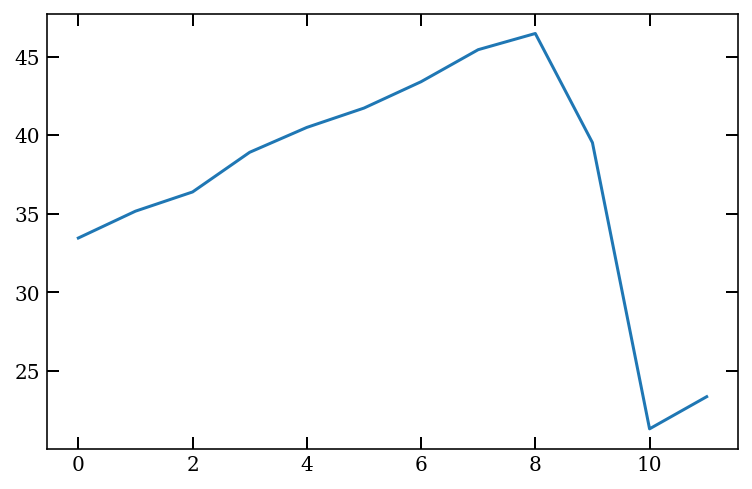

In [50]:
plt.plot(std_vec)

In [51]:
i = 10
n_steps = 12
template = 45
diffed = ev_masked[i::n_steps,:,:] - ev_masked[template,:,:]

In [52]:
def pltdif(f):
    plt.plot(star.time[::12], manual_lc[::12]/np.nanmedian(manual_lc[::12]), '.', label='Sum ev. pixels', ms=4)
    plt.plot(star.time, manual_lc/np.nanmedian(manual_lc), '.', label='Sum ev. pixels', ms=1, alpha=0.3)
    plt.ylim(0.98, 1.1)
    plt.xlim(2385, 2440)
    plt.vlines(star.time[0+f*12], 0.98, 1.1)
    plt.show()
    plt.imshow(diffed[f, :,:],vmin=0,vmax=70)
    plt.colorbar()
    plt.minorticks_on()
    plt.show()

In [53]:
interact(pltdif, f=(0,321,1));

interactive(children=(IntSlider(value=160, description='f', max=321), Output()), _dom_classes=('widget-interact',))

## Look at the localised light-curve

In [54]:
manual_lc = np.nansum(datacube*star.aperture, axis=(1,2))

In [55]:
datacube.shape

(3863, 8, 8)

In [56]:
SNisolate = datacube[:,[1,2],[4]]

In [57]:
SNisolate.shape

(3863, 2)

In [58]:
SNflux=np.nansum(SNisolate, axis=(1))

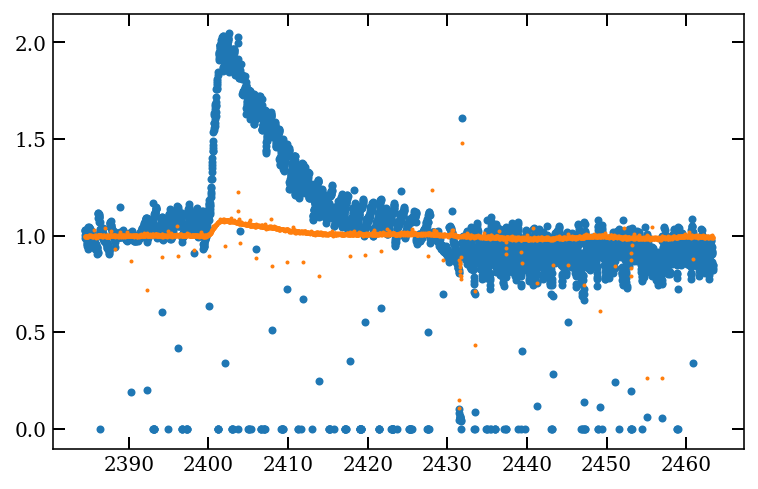

In [59]:
plt.plot(star.time, SNflux/np.nanmedian(SNflux),'.')
plt.plot(star.time, star.fraw/np.nanmedian(star.fraw), '.', label='EVEREST Raw', ms=2)

In [60]:
diffed.shape

(322, 8, 8)

In [61]:
star.dvs()

INFO  [everest.user.DownloadFile()]: Found cached file.


Neat!

<!--NAVIGATION-->
< [Spot-check Everest Validation Summaries for KEGS](01.06-Everest_KEGS_DVS.ipynb) | [Contents](Index.ipynb) | [Supernova Searches](02.00-Supernova_searches.ipynb) >

## Testing gradients 

In [62]:
tester = manual_lc/np.nanmedian(manual_lc)

In [63]:
grad = np.gradient(tester[10::24])

The gradient of the custom light curve is calculated then plotted below. There is a gradient that coresponds to the SN, however it is small and easily lost in the full noise. When checked on 212535880 no signal could be detected. It is not surprising that this method is unsuitable as differentiating highlights noise in the data. It may be possible to employ this for AGN, however, that would take some experimenting.

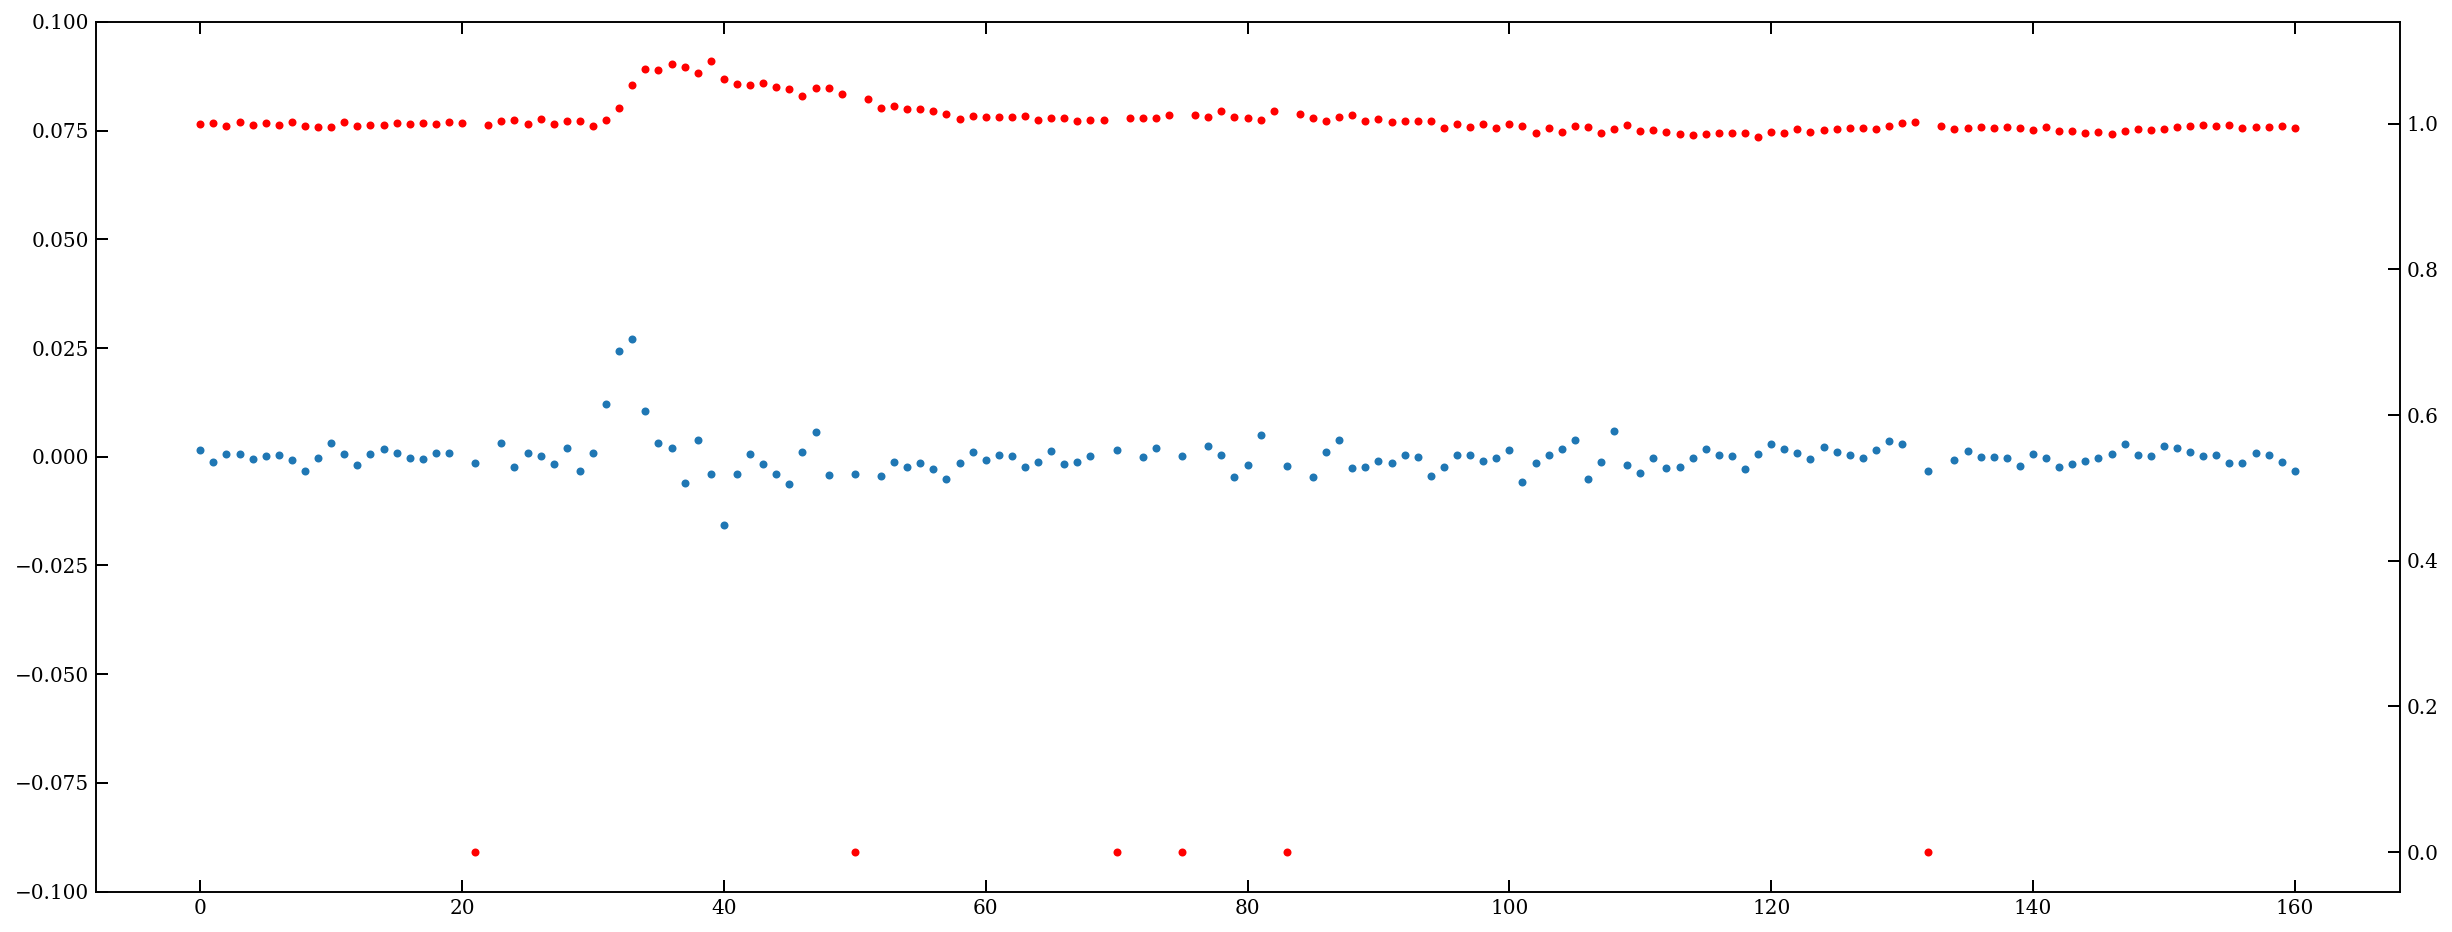

In [64]:
plt.figure(figsize=(20,8))
plt.plot(grad,'.')
plt.ylim(-.1,.1)
ax = plt.twinx()
ax.plot(tester[10::24],'r.');

Trying to see if the peak can be detected with standard deviations from the mean gradient.

In [65]:
np.nanmean(grad)

-3.964154991933008e-05

In [66]:
np.nanmean(grad[0:80])

0.00012695428045244038

In [67]:
np.nanstd(grad[0:100])

0.16005581979353728

In [68]:
mean = np.nanmean(grad)
sd = np.nanstd(grad)

corgrad = [x for x in grad if (x > mean - 2 *sd and x<mean+2*sd)]

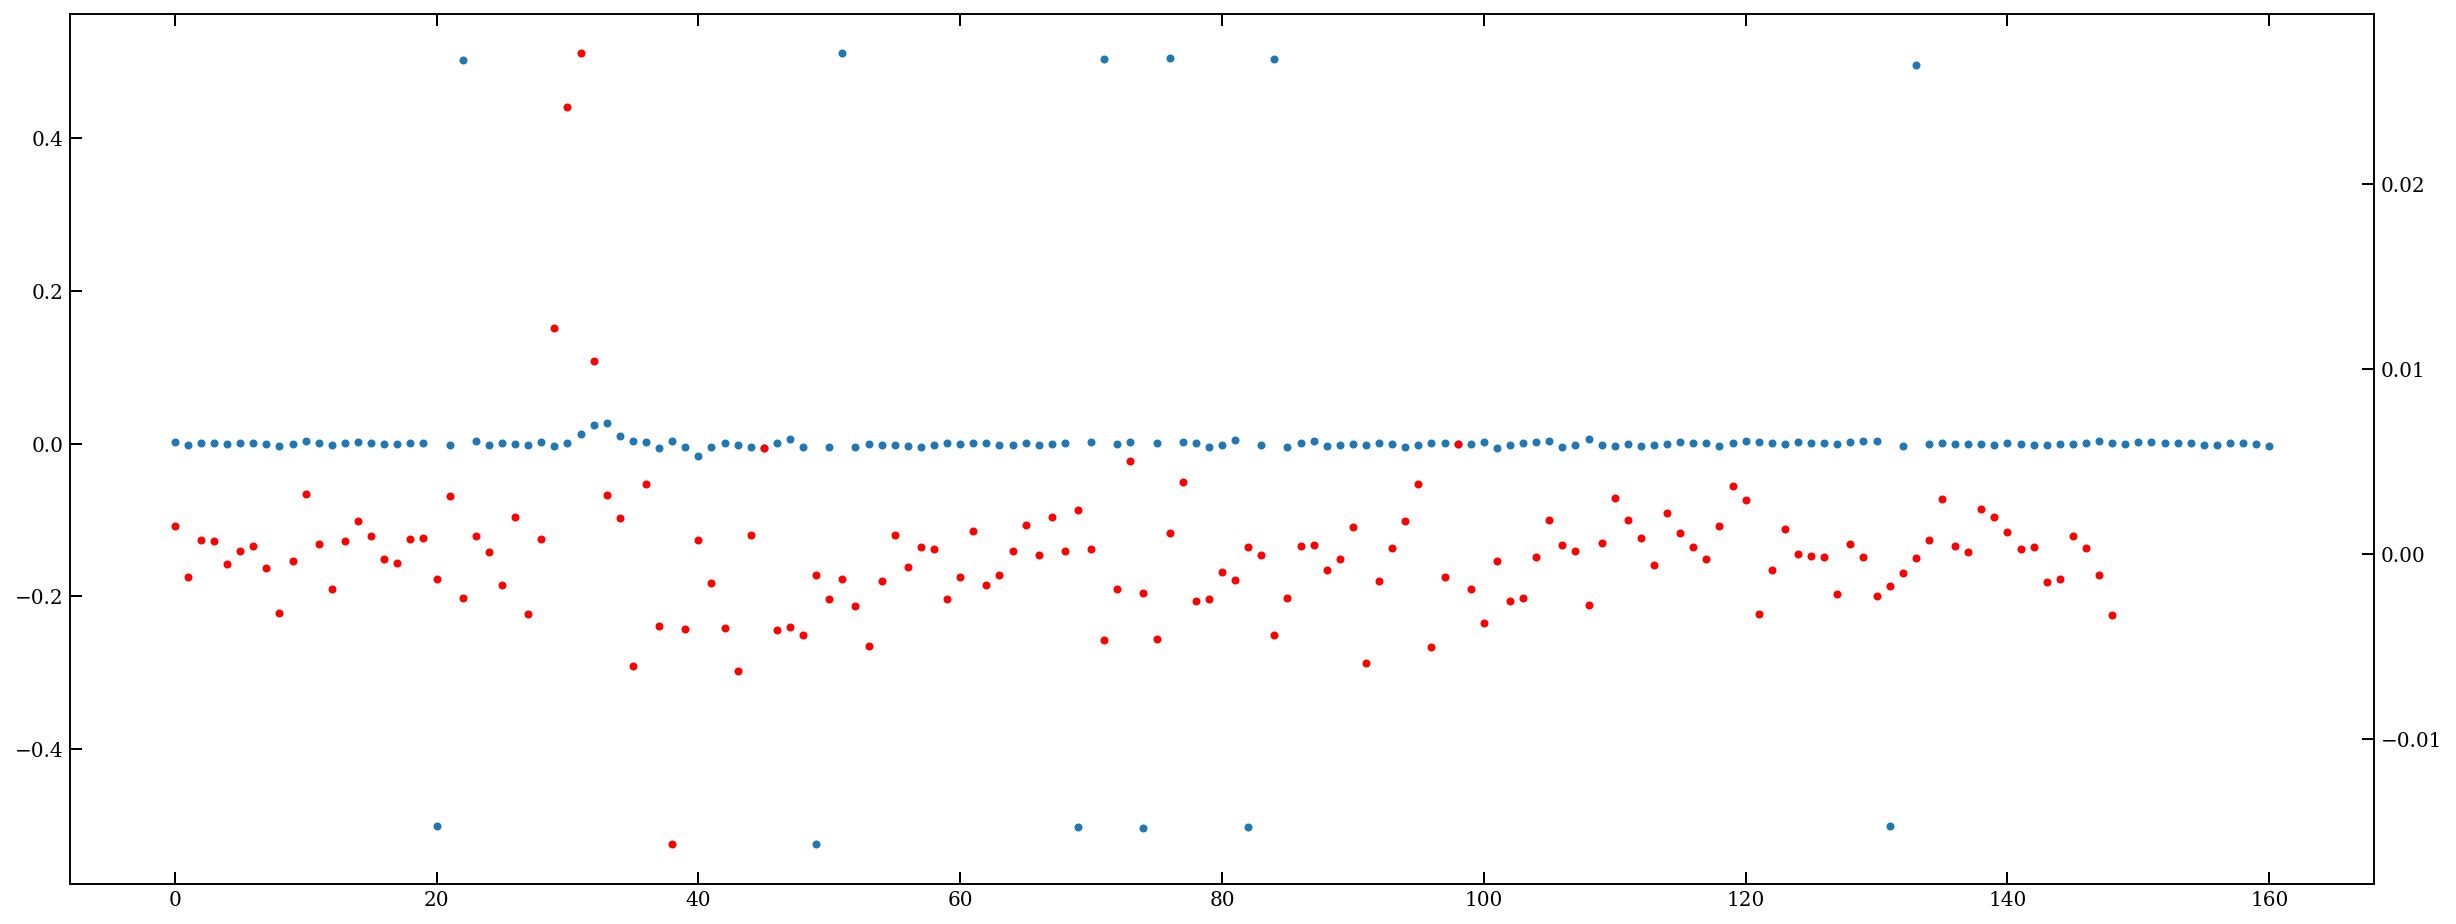

In [69]:
plt.figure(figsize=(20,8))
plt.plot(grad,'.')
ax = plt.twinx()
ax.plot(corgrad,'r.')

Applying previous method played around with the gradient to the light curve, to find success.

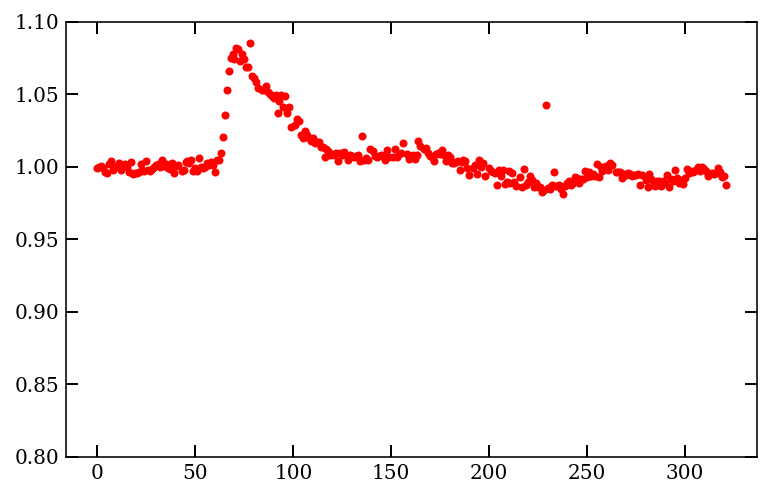

In [70]:
plt.plot(tester[10::12],'r.')
plt.ylim(0.8,1.1);

In [71]:
np.nanstd(tester)

0.18790454555517747

In [72]:
med = np.nanmedian(tester)
sd = np.nanstd(tester)

cutplt = [x for x in tester if (x > med - 2*sd and x<med+2*sd)]

In [73]:
np.array(cutplt).shape

(3722,)

In [74]:
mask=(tester>med-2*sd and tester<med+2*sd)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [75]:
tester.shape

(3863,)

Cutting with a 2$\sigma$ condition removes many of the extreme points on the light curve. Further conditioning by selecting the 'stable' values seems nesscissary 

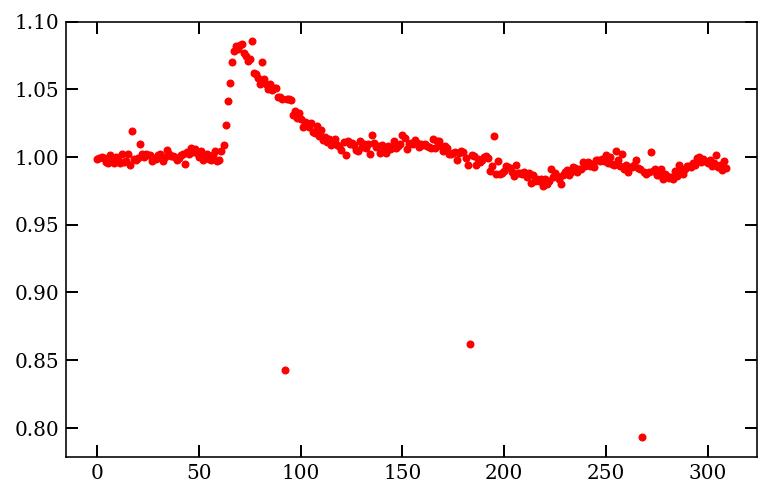

In [76]:
plt.plot(cutplt[10::12],'r.'); 

In [77]:
np.nanstd(cutplt)

0.026809990803137822

Find the position of points that are 2$\sigma$ above the standard. Only above is used since a transient will add flux, not subtract it.

In [78]:
thingo = cutplt[10::12]>np.nanmedian(cutplt)+2*np.nanstd(cutplt)

In [79]:
stable = cutplt[10::12]

In [80]:
x = np.arange(0,thingo.shape[0],1)

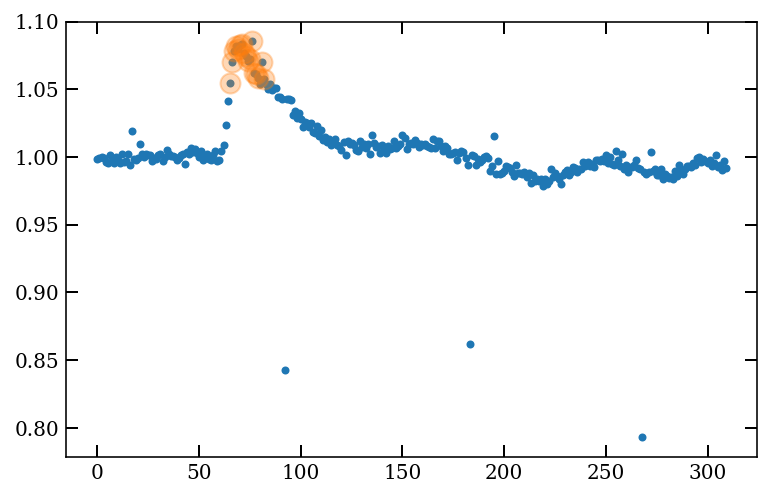

In [81]:
plt.plot(stable,'.')
plt.plot(np.take(x,np.where(thingo)[0]),np.take(stable,np.where(thingo)[0]),'o',alpha=0.3, markersize = 10);

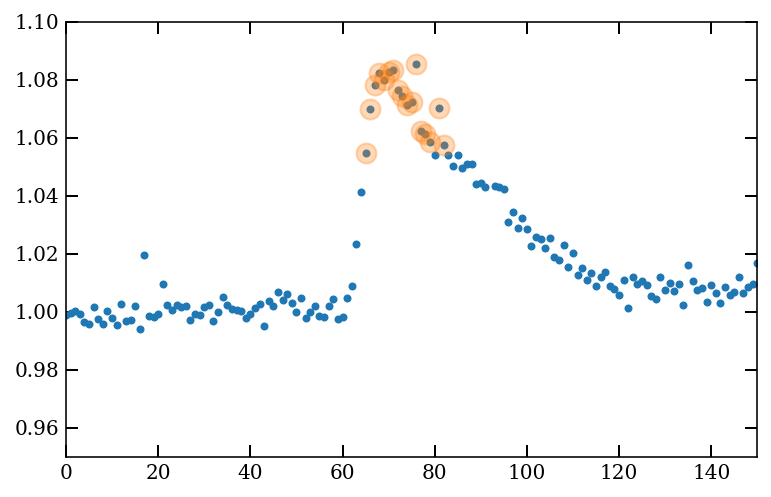

In [82]:
plt.plot(stable,'.')
plt.plot(np.take(x,np.where(thingo)[0]),np.take(stable,np.where(thingo)[0]),'o',alpha=0.3, markersize = 10)
plt.ylim(.95,1.1)
plt.xlim(0,150);

This has clearly identified the points at maximum. Thesholding on number of consecutive points should only select transients.

In [83]:
def K2tran(pixelfile):
    hdu = fits.open(pixelfile)
    dat = hdu[1].data
    datacube = dat["FLUX"]
    time = dat["TIME"]
    LC = np.nansum(datacube, axis=(1,2))
    
    n_steps = 12
    std_vec = np.zeros(n_steps)
    for i in range(n_steps):
        std_vec[i] = np.nanstd(datacube[i:-n_steps+i:n_steps,:,:] - datacube[i+n_steps*80,:,:])
    Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
    print(Framemin)
    lc = LC/np.nanmedian(LC)
    slc = LC[Framemin::n_steps]/np.nanmedian(LC[Framemin::n_steps])
    stime = time[Framemin::n_steps]
    
    med = np.nanmedian(lc)
    std = np.nanstd(lc)

    cutlc = [x for x in lc if (x >med-2*std and x<med+2*std)] #np.take(np.where(lc>med-2*sd and  lc<med+2*sd))) 
    #cuttime = np.take(time,np.where(lc==cutlc))
    #scuttime = cuttime[Framemin::n_steps]
    scutlc = cutlc[Framemin::n_steps]
    excess = cutlc[Framemin::n_steps]>(np.nanmedian(cutlc)+2*np.nanstd(cutlc))

    i = 0
    line = 0

    while line < 3 and i<len(excess):
        Index = []
        while excess[i] == True:
            line = line +1
            Index.append(i)
            i=i+1
        i=i+1
    if len(Index)<3:
        Index = []
    if len(Index)>0:
        plt.figure()
        plt.plot(scutlc,'.')
        plt.plot(Index,np.array(scutlc)[Index],'o',alpha=0.3, markersize = 10)
        plt.title(pixelfile.split('/')[-1].split('-')[0])
        plt.xlabel('Time (frames)')
        plt.ylabel('Normalised flux')
        plt.savefig((pixelfile.split('/')[-1].split('-')[0]+'png')); #np.take(scuttime,np.where(excess[Index])[0]),
    return lc, time, excess, Index, Framemin 

10


(array([ 0.9917497 ,  0.99851257,  0.99313438, ...,  0.99936587,
         0.99324208,  0.98922908], dtype=float32),
 array([ 2384.4632718 ,  2384.48370406,  2384.50413641, ...,  2463.33005237,
         2463.35048422,  2463.37091607]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False

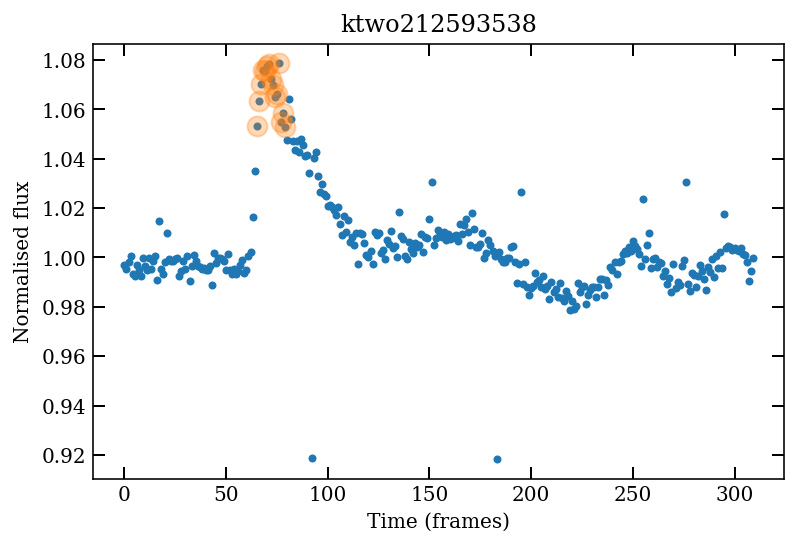

In [84]:
K2tran('../data/ktwo212593538-c06_lpd-targ.fits')

In [85]:
hdu = fits.open('../data/ktwo211691452-c05_lpd-targ.fits')
dat = hdu[1].data
datacube = dat["FLUX"]
time = dat["TIME"]
LC = np.nansum(datacube, axis=(1,2))

n_steps = 12
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(datacube[i:-n_steps+i:n_steps,:,:] - datacube[i+n_steps*80,:,:])
Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
print(Framemin)
lc = LC/np.nanmedian(LC)
slc = LC[Framemin::n_steps]/np.nanmedian(LC[Framemin::n_steps])
stime = time[Framemin::n_steps]

med = np.nanmedian(lc)
std = np.nanstd(lc)

cutlc = [x for x in lc if (x >med-2*sd and x<med+2*sd)] #np.take(np.where(lc>med-2*sd and  lc<med+2*sd))) 
#cuttime = np.take(time,np.where(lc==cutlc))
#scuttime = cuttime[Framemin::n_steps]
scutlc = cutlc[Framemin::n_steps]
excess = cutlc[Framemin::n_steps]>(np.nanmedian(cutlc)+2*np.nanstd(cutlc))

i = 0
line = 0

while line < 3 and i<len(excess):
    Index = []
    while excess[i] == True:
        line = line +1
        Index.append(i)
        i=i+1
    i=i+1
plt.figure()
plt.plot(scutlc,'.')
plt.plot(Index,np.array(scutlc)[Index],'o',alpha=0.3, markersize = 10)
plt.ylim(.95,1.1); #np.take(scuttime,np.where(excess[Index])[0]),


FileNotFoundError: [Errno 2] No such file or directory: '../data/ktwo211691452-c05_lpd-targ.fits'

In [ ]:
hdu = fits.open('../data/ktwo211691452-c05_lpd-targ.fits')
dat = hdu[1].data
datacube = dat["FLUX"]

In [ ]:
datacube

In [ ]:
n_steps = 12
std_vec = np.zeros(n_steps)
for i in range(n_steps):
    std_vec[i] = np.nanstd(datacube[i:-n_steps+i:n_steps,:,:] - datacube[i+n_steps,:,:])
Framemin = np.where(std_vec==np.nanmin(std_vec))[0][0]
print(Framemin)